# CIFAR-100 Image Classification using ResNet in PyTorch


### Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt


Torchvision is a library for computer vision tasks, built on top of PyTorch. It provides datasets, data loaders, and data transforms for image classification tasks.

### Data transformation and augmentation

In [4]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

# Loading Data

In [5]:
train_data = CIFAR100(download=True, root="./data", transform=train_transform)
test_data = CIFAR100(root="./data", train=False, transform=test_transform)

100.0%


Extracting ./data/cifar-100-python.tar.gz to ./data


_____

In [5]:
for image, label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[ 2.4300,  2.4300,  2.4495,  ...,  1.6890,  1.3380,  0.7920],
         [ 2.4495,  2.4495,  2.4495,  ...,  2.1960,  1.9425,  1.2795],
         [ 2.4300,  2.4300,  2.4495,  ...,  1.6890,  1.3380,  0.7920],
         ...,
         [ 0.5580,  0.5970,  0.4605,  ..., -0.2026, -1.0216, -1.5676],
         [ 0.2070,  0.2460,  0.3630,  ..., -0.3976, -1.6846, -1.9381],
         [-0.0660, -0.1831, -0.1441,  ..., -0.7486, -1.9381, -2.0941]],

        [[ 2.5636,  2.5636,  2.5833,  ...,  2.0307,  1.7149,  1.0241],
         [ 2.5833,  2.5833,  2.5833,  ...,  2.5241,  2.2872,  1.5965],
         [ 2.5636,  2.5636,  2.5833,  ...,  2.0307,  1.7149,  1.0241],
         ...,
         [ 1.4781,  1.5373,  1.3794,  ..., -0.3179, -1.2258, -1.7784],
         [ 1.0833,  1.1426,  1.2018,  ..., -0.4166, -1.8179, -2.1139],
         [ 0.7084,  0.6097,  0.6492,  ..., -0.6534, -2.0547, -2.1336]],

        [[ 2.7406,  2.7406,  2.7600,  ...,  2.1209,  1.5787,  0

This code block iterates through the train_data dataset, which is a collection of image-label pairs. For each pair, it prints the shape and tensor of the image, as well as the corresponding label. The loop is then immediately broken, so only the first image-label pair is processed and printed. This is useful for inspecting the first few samples in the dataset to ensure that the data is being loaded and processed correctly.
___

In [6]:
train_classes_items = dict()

for train_item in train_data:
    label = train_data.classes[train_item[1]]
    if label not in train_classes_items:
        train_classes_items[label] = 1
    else:
        train_classes_items[label] += 1

train_classes_items

{'cattle': 500,
 'dinosaur': 500,
 'apple': 500,
 'boy': 500,
 'aquarium_fish': 500,
 'telephone': 500,
 'train': 500,
 'cup': 500,
 'cloud': 500,
 'elephant': 500,
 'keyboard': 500,
 'willow_tree': 500,
 'sunflower': 500,
 'castle': 500,
 'sea': 500,
 'bicycle': 500,
 'wolf': 500,
 'squirrel': 500,
 'shrew': 500,
 'pine_tree': 500,
 'rose': 500,
 'television': 500,
 'table': 500,
 'possum': 500,
 'oak_tree': 500,
 'leopard': 500,
 'maple_tree': 500,
 'rabbit': 500,
 'chimpanzee': 500,
 'clock': 500,
 'streetcar': 500,
 'cockroach': 500,
 'snake': 500,
 'lobster': 500,
 'mountain': 500,
 'palm_tree': 500,
 'skyscraper': 500,
 'tractor': 500,
 'shark': 500,
 'butterfly': 500,
 'bottle': 500,
 'bee': 500,
 'chair': 500,
 'woman': 500,
 'hamster': 500,
 'otter': 500,
 'seal': 500,
 'lion': 500,
 'mushroom': 500,
 'girl': 500,
 'sweet_pepper': 500,
 'forest': 500,
 'crocodile': 500,
 'orange': 500,
 'tulip': 500,
 'mouse': 500,
 'camel': 500,
 'caterpillar': 500,
 'man': 500,
 'skunk': 500

#### For training dataset

This code block creates a dictionary called train_classes_items that counts the number of occurrences of each class label in the train_data dataset. It iterates through each image-label pair in train_data, extracts the label, and increments a counter for that label in the train_classes_items dictionary. If the label is not already in the dictionary, it is added with a count of 1. The resulting dictionary contains the count of each class label in the train_data dataset.

____


#### For testing dataset


In [7]:
test_classes_items = dict()
for test_item in test_data:
    label = test_data.classes[test_item[1]]
    if label not in test_classes_items:
        test_classes_items[label] = 1
    else:
        test_classes_items[label] += 1

test_classes_items

{'mountain': 100,
 'forest': 100,
 'seal': 100,
 'mushroom': 100,
 'sea': 100,
 'tulip': 100,
 'camel': 100,
 'butterfly': 100,
 'cloud': 100,
 'apple': 100,
 'skunk': 100,
 'streetcar': 100,
 'rocket': 100,
 'lamp': 100,
 'lion': 100,
 'wolf': 100,
 'rose': 100,
 'orange': 100,
 'dinosaur': 100,
 'chimpanzee': 100,
 'can': 100,
 'keyboard': 100,
 'bicycle': 100,
 'chair': 100,
 'plate': 100,
 'lawn_mower': 100,
 'turtle': 100,
 'palm_tree': 100,
 'shark': 100,
 'pickup_truck': 100,
 'boy': 100,
 'couch': 100,
 'house': 100,
 'porcupine': 100,
 'cockroach': 100,
 'clock': 100,
 'castle': 100,
 'beaver': 100,
 'bee': 100,
 'bottle': 100,
 'pear': 100,
 'baby': 100,
 'flatfish': 100,
 'oak_tree': 100,
 'leopard': 100,
 'snail': 100,
 'crocodile': 100,
 'rabbit': 100,
 'beetle': 100,
 'girl': 100,
 'sunflower': 100,
 'raccoon': 100,
 'train': 100,
 'ray': 100,
 'trout': 100,
 'bowl': 100,
 'snake': 100,
 'orchid': 100,
 'tractor': 100,
 'caterpillar': 100,
 'bus': 100,
 'mouse': 100,
 'cr

# BATCHSIZE & DataLoader

In [8]:
BATCH_SIZE = 128
train_dl = DataLoader(train_data, BATCH_SIZE, num_workers=4, pin_memory=True, shuffle=True)
test_dl = DataLoader(test_data, BATCH_SIZE, num_workers=4, pin_memory=True)


This code block defines a batch size of 128 and creates two data loaders, train_dl and test_dl, for the train_data and test_data datasets, respectively. The DataLoader class from PyTorch is used to create these data loaders, which provide an iterator over the dataset and allow for efficient data loading and batching. The num_workers parameter specifies the number of subprocesses to use for data loading, and pin_memory is used to speed up data transfer to the GPU. The shuffle parameter is set to True for the train_dl data loader, which means that the data will be shuffled before each epoch, ensuring that the model sees different batches of data in each epoch. The test_dl data loader does not have the shuffle parameter set to True, so the data will be loaded in the same order in each epoch.

# Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


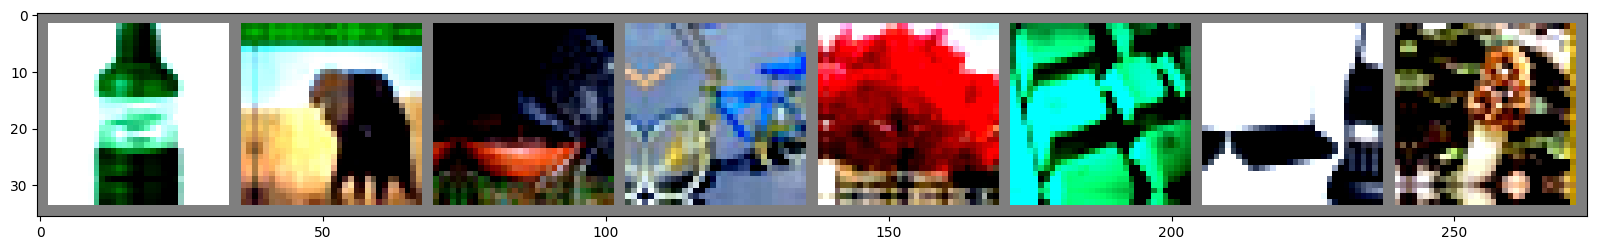

bottle              elephant            porcupine           bicycle             maple_tree          keyboard            telephone           mushroom            


In [9]:
# for 8 images
train_8_samples = DataLoader(train_data, 8, num_workers=4, pin_memory=True, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of images and labels using loop (for multi-processing)
for images, labels in train_8_samples:
    imshow(torchvision.utils.make_grid(images))
    print(''.join(f'{train_data.classes[labels[j]]:20s}' for j in range(len(labels))))  # Use len(labels) for dynamic printing
    break  # You only need to process 1 batch (8 images)

1. Creates a data loader train_8_samples that loads 8 images at a time from the train_data dataset.
2. Defines a function imshow that displays a grid of images using Matplotlib.
3. Iterates over the train_8_samples data loader using a for loop, which yields a batch of 8 images and their corresponding labels.
4. Calls the imshow function to display the grid of images.
5. Prints the corresponding class labels for each image using the train_data.classes attribute.
6. Uses the break statement to exit the loop after processing the first batch of 8 images.

The main difference between this code block and the previous one is that this code block uses a for loop to iterate over the data loader, whereas the previous code block used the next method to get a single batch of images. This allows for more flexibility and control over the iteration process.

# Get CUDA ready

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
use_cuda = torch.cuda.is_available()

In [3]:
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

__CUDNN VERSION: 90100
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce RTX 4070 Laptop GPU
__CUDA Device Total Memory [GB]: 8.585216


In [11]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    return torch.device("cpu")

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class ToDeviceLoader:
    def __init__(self,data,device):
        self.data = data
        self.device = device

    def __iter__(self):
        for batch in self.data:
            yield to_device(batch,self.device)

    def __len__(self):
        return len(self.data)


In [12]:
device = get_device()
print(device)

train_dl = ToDeviceLoader(train_dl, device)
test_dl = ToDeviceLoader(test_dl, device)

cuda


This code block defines three functions and a class for handling device management in PyTorch, and then applies them to the train_dl and test_dl data loaders.

1. get_device: This function checks if a GPU is available and returns a PyTorch device object for either the GPU or the CPU.
2. to_device: This function takes a PyTorch tensor or a list/tuple of tensors and moves them to the specified device. If the input is a list or tuple, it recursively applies the to_device function to each element.
3. ToDeviceLoader: This class is a wrapper around a PyTorch data loader that automatically moves each batch of data to the specified device. It defines an __iter__ method that iterates over the data loader and applies the to_device function to each batch, and a __len__ method that returns the length of the data loader.
   
The code then gets the device using the get_device function and prints it. It then applies the ToDeviceLoader class to the train_dl and test_dl data loaders, which moves each batch of data to the specified device.

By using these functions and classes, you can ensure that your data and models are always on the correct device, which can help prevent errors and improve performance.

In [13]:
def accuracy(predicted, actual):
    _, predictions = torch.max(predicted, dim=1)
    return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))

This is a PyTorch function to calculate the accuracy of a model's predictions. Here's a breakdown of what it does:

1. `_, predictions` = torch.max(predicted, dim=1): This line takes the predicted output from the model and finds the index of the maximum value along the last dimension (typically the number of classes). This gives us the predicted class labels.
2. `return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))`: This line calculates the accuracy by comparing the predicted class labels with the actual class labels. Here's what's happening:
    - predictions==actual creates a tensor of booleans indicating whether each prediction matches the actual label.
    - torch.sum sums up the number of True values in this tensor, giving us the number of correct predictions.
    - .item() converts this sum to a Python integer.
    - len(predictions) gives us the total number of predictions.
    - The accuracy is then calculated by dividing the number of correct predictions by the total number of predictions.
    - The result is wrapped in a PyTorch tensor using torch.tensor.

The function returns a PyTorch tensor containing the accuracy value, which can be used for further processing or logging.

# BaseModel

In [15]:
class BaseModel(nn.Module):
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss

    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {"val_loss":loss.detach(),"val_acc":acc}

    def validation_epoch_end(self,outputs):
        batch_losses = [loss["val_loss"] for loss in outputs]
        loss = torch.stack(batch_losses).mean()
        batch_accuracy = [accuracy["val_acc"] for accuracy in outputs]
        acc = torch.stack(batch_accuracy).mean()
        return {"val_loss":loss.item(),"val_acc":acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

# ResNet Implementation

BaseModel allows us to check and record the results of our model every time we train and pretty much just helps us keep track of our progress. This is what our actual model will inherit. <br />

I implemented ResNet with changing a little bit that worked better than the one I got and used as base.<br />

#### An example figure of ResNet approach to understand easily what we will see below as code:

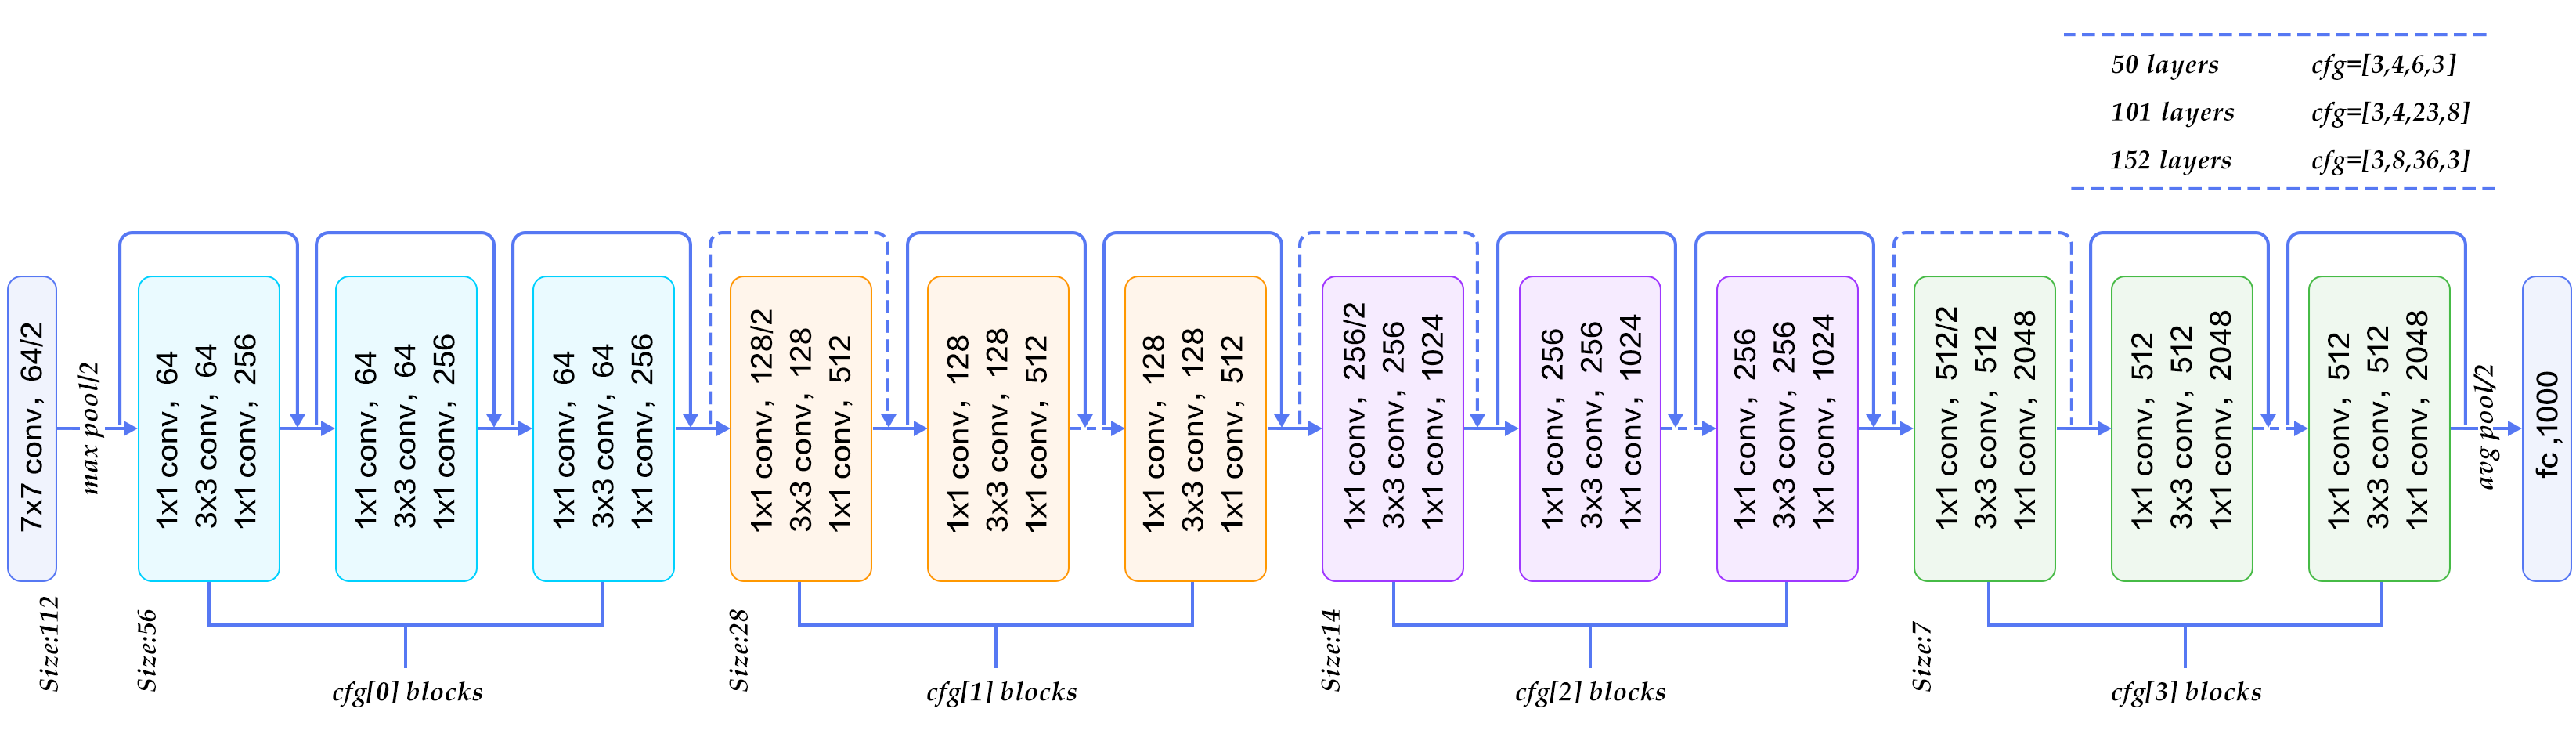
<br/><br/><br/><br/>
____



In [17]:
def conv_shortcut(in_channel, out_channel, stride):
    layers = [nn.Conv2d(in_channel, out_channel, kernel_size=(1,1), stride=(stride, stride)),
             nn.BatchNorm2d(out_channel)]
    return nn.Sequential(*layers)

def block(in_channel, out_channel, k_size,stride, conv=False):
    layers = None

    first_layers = [nn.Conv2d(in_channel,out_channel[0], kernel_size=(1,1),stride=(1,1)),
                    nn.BatchNorm2d(out_channel[0]),
                    nn.ReLU(inplace=True)]
    if conv:
        first_layers[0].stride=(stride,stride)

    second_layers = [nn.Conv2d(out_channel[0], out_channel[1], kernel_size=(k_size, k_size), stride=(1,1), padding=1),
                    nn.BatchNorm2d(out_channel[1])]

    layers = first_layers + second_layers

    return nn.Sequential(*layers)


class ResNet(BaseModel):

    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.stg1 = nn.Sequential(
                                   nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=(3),
                                             stride=(1), padding=1),
                                   nn.BatchNorm2d(64),
                                   nn.ReLU(inplace=True),
                                   nn.MaxPool2d(kernel_size=3, stride=2))

        ##stage 2
        self.convShortcut2 = conv_shortcut(64,256,1)

        self.conv2 = block(64,[64,256],3,1,conv=True)
        self.ident2 = block(256,[64,256],3,1)


        ##stage 3
        self.convShortcut3 = conv_shortcut(256,512,2)

        self.conv3 = block(256,[128,512],3,2,conv=True)
        self.ident3 = block(512,[128,512],3,2)


        ##stage 4
        self.convShortcut4 = conv_shortcut(512,1024,2)

        self.conv4 = block(512,[256,1024],3,2,conv=True)
        self.ident4 = block(1024,[256,1024],3,2)


        ##Classify
        self.classifier = nn.Sequential(
                                       nn.AvgPool2d(kernel_size=(4)),
                                       nn.Flatten(),
                                       nn.Linear(1024, num_classes))

    def forward(self,inputs):
        out = self.stg1(inputs)

        #stage 2
        out = F.relu(self.conv2(out) + self.convShortcut2(out))
        out = F.relu(self.ident2(out) + out)
        out = F.relu(self.ident2(out) + out)
        out = F.relu(self.ident2(out) + out)

        #stage3
        out = F.relu(self.conv3(out) + (self.convShortcut3(out)))
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)

        #stage4
        out = F.relu(self.conv4(out) + (self.convShortcut4(out)))
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)

        #Classify
        out = self.classifier(out)#100x1024

        return out


In [18]:
model = ResNet(3,100)

In [19]:
model = to_device(model, device)

# Evaluation & Fit Function for Training

In [20]:
@torch.no_grad()
def evaluate(model,test_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_dl]
    return model.validation_epoch_end(outputs)

In [21]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit (epochs, train_dl, test_dl, model, optimizer, max_lr, weight_decay, scheduler, grad_clip=None):
    torch.cuda.empty_cache()

    history = []

    optimizer = optimizer(model.parameters(), max_lr, weight_decay = weight_decay)

    scheduler = scheduler(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_dl))

    for epoch in range(epochs):
        model.train()

        train_loss = []

        lrs = []

        for batch in train_dl:
            loss = model.training_step(batch)

            train_loss.append(loss)

            loss.backward()

            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            scheduler.step()
            lrs.append(get_lr(optimizer))
        result = evaluate(model, test_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs

        model.epoch_end(epoch,result)
        history.append(result)

    return history


# Hyperparameters

- **max_lr**: is the maximum learning rate that we set for learning rate scheduler. For the learning rate scheduler we used OneCycleLR, which sets the learning rate to a low learning rate, gradually increases it to the max learning rate then goes back to a low learning rate. <br/>
- **grad_clip**: prevents the gradients to become too large. <br/>
- **weight_decay**: essentially tries to make the model simple and helps the model generalise better.


In [22]:
epochs = 100
optimizer = torch.optim.Adam
max_lr = 1e-3
grad_clip = 0.1
weight_decay = 1e-5
scheduler = torch.optim.lr_scheduler.OneCycleLR

# Training

In [23]:
%%time
history = fit(epochs=epochs, train_dl=train_dl, test_dl=test_dl, model=model,
              optimizer=optimizer, max_lr=max_lr, grad_clip=grad_clip,
              weight_decay=weight_decay, scheduler=torch.optim.lr_scheduler.OneCycleLR)

d:\Gayanuka Amarasuriya\Documents\Machine Learning\Projects\Image Classification\Reference\myenv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [0], last_lr: 0.00004, train_loss: 3.8996, val_loss: 4.0139, val_acc: 0.0920
Epoch [1], last_lr: 0.00005, train_loss: 3.2219, val_loss: 3.7597, val_acc: 0.1220
Epoch [2], last_lr: 0.00006, train_loss: 2.8961, val_loss: 3.5017, val_acc: 0.1648
Epoch [3], last_lr: 0.00008, train_loss: 2.6534, val_loss: 3.1881, val_acc: 0.2136
Epoch [4], last_lr: 0.00010, train_loss: 2.4621, val_loss: 2.8653, val_acc: 0.2773
Epoch [5], last_lr: 0.00013, train_loss: 2.3105, val_loss: 2.7773, val_acc: 0.2954
Epoch [6], last_lr: 0.00016, train_loss: 2.1710, val_loss: 2.6311, val_acc: 0.3257
Epoch [7], last_lr: 0.00020, train_loss: 2.0583, val_loss: 2.6866, val_acc: 0.3133
Epoch [8], last_lr: 0.00024, train_loss: 1.9704, val_loss: 2.4336, val_acc: 0.3701
Epoch [9], last_lr: 0.00028, train_loss: 1.8872, val_loss: 2.2949, val_acc: 0.3923
Epoch [10], last_lr: 0.00032, train_loss: 1.8306, val_loss: 2.4182, val_acc: 0.3733
Epoch [11], last_lr: 0.00037, train_loss: 1.7516, val_loss: 2.3921, val_acc: 0.3761
Ep

# Plotting

In [24]:
def plot_acc(history):
    plt.plot([x["val_acc"] for x in history],"-x")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

def plot_loss(history):
    plt.plot([x.get("train_loss") for x in history], "-bx")
    plt.plot([x["val_loss"] for x in history],"-rx")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train loss","val loss"])

def plot_lrs(history):
    plt.plot(np.concatenate([x.get("lrs",[]) for x in history]))
    plt.xlabel("Batch number")
    plt.ylabel("Learning rate")

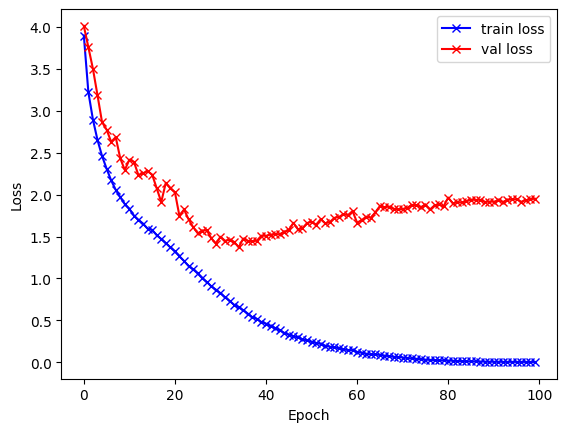

In [25]:
plot_loss(history)

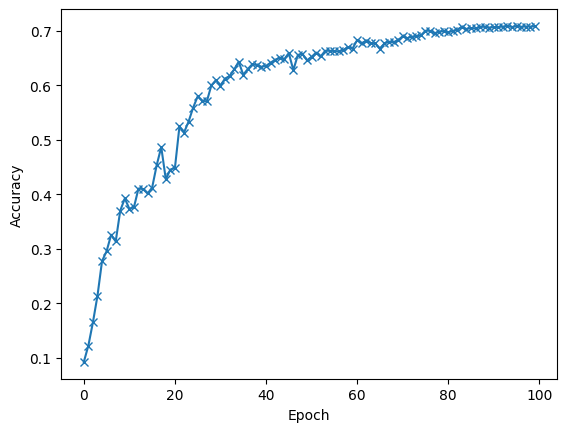

In [26]:
plot_acc(history)

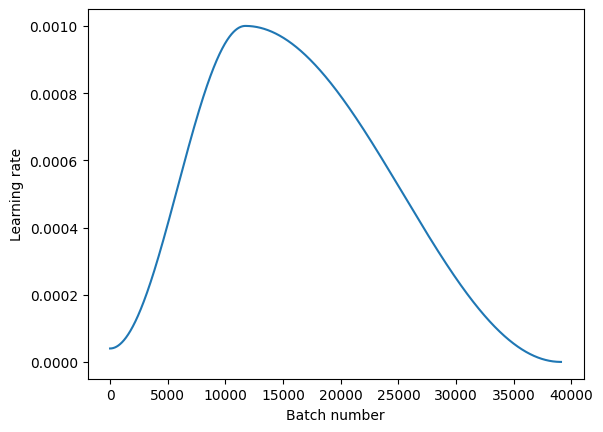

In [27]:
plot_lrs(history)

# Make predictions and see the image with its result


In [28]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return test_data.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: mountain , Predicted: road


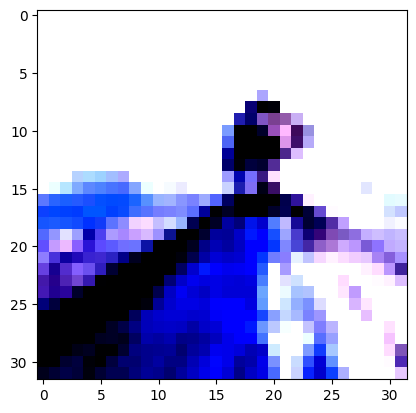

In [29]:
img, label = test_data[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: wardrobe , Predicted: wardrobe


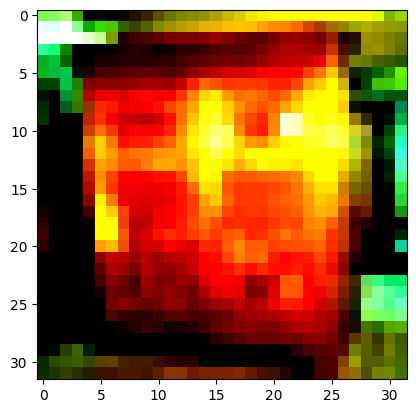

In [30]:
img, label = test_data[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: house , Predicted: train


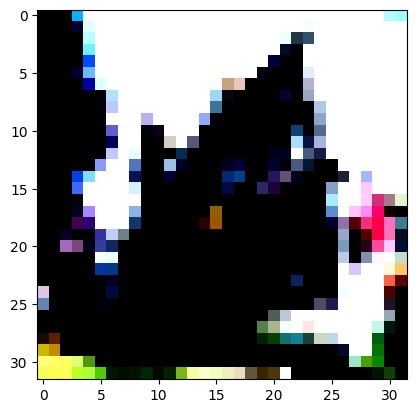

In [45]:
img, label = test_data[808]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

# Save

In [31]:
torch.save(model.state_dict(), 'cifar100-resnet-project.pth')